In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [3]:
sns.set_theme(style="whitegrid")

In [4]:
NOTEBOOK_PATH = os.getcwd() 
DATA_PATH = os.path.join(NOTEBOOK_PATH, 'participant_data')

In [5]:
def find_participant_ids():
    """
    Participant ids are the directory names in participant data directory.
    """
    return os.listdir(DATA_PATH)

In [6]:
def load_experiment_data(experiment='savings', phase=0):
    """
    Load experiment data for all participants
    """
    participant_ids = find_participant_ids()
    savings_data = {}
    for participant_id in participant_ids:
        savings_file = os.path.join(DATA_PATH,  participant_id,experiment, f'{phase}',f"participant_{participant_id}_session_1.csv")       
        if os.path.exists(savings_file):
            savings_data[participant_id] = pd.read_csv(savings_file)    
    return  pd.concat(savings_data.values())

In [7]:
def load_savings_data(phase):
    """
    Load savings data for all participants in a phase.
    """
    return load_experiment_data('savings', phase)

In [8]:
def load_generalization_data(phase):
    """
    Load generalization data for all participants in a phase.
    """
    return load_experiment_data('generalization', phase)

In [9]:
def load_bonus_data(phase):
    """
    Load bonus data for all participants in a phase.
    """
    return load_experiment_data('bonus', phase)

# Group A : Generalization


In [10]:
experimental_conditions = {
    'sudden': [[20, 80], [120, 180]],
    'no perturbation': [[0, 20], [80, 120], [180, 200]]
}

In [11]:
experimental_condition_color_mapping = {
    'sudden': 'pink',
    'no perturbation': 'grey'
}

## Savings

In [12]:
PLOT_PATH = os.path.join(NOTEBOOK_PATH, 'reaching_ex2_plots')

def plot_error_angle_for_participants(subjects, experimental_conditions, label=""):
    """
    Plot error angle for all participants.
    """
    plt.figure(figsize=(20, 7))

    # Define color mapping for experimental conditions
    experimental_condition_color_mapping = {
        'sudden': 'pink',
        'no perturbation': 'grey'
    }

    # Shade regions based on experimental conditions
    for region, region_limits in experimental_conditions.items():
        for region_limit in region_limits:
            plt.axvspan(region_limit[0], region_limit[1],
                        color=experimental_condition_color_mapping[region],
                        alpha=0.3, label=region.capitalize())

    # Plot error angles for each participant
    sns.lineplot(x='Attempt', y='Error Angle', data=subjects,
                 hue='Participant ID', linestyle='-.', marker='o')

    # Set labels and title
    plt.xlabel('Attempt')
    plt.ylabel('Error Angle (Degrees)')
    plt.title(f'Error Angle of Each Participant Over Time for {label}')

    # Set y-axis limits to [-150, 150]
    plt.ylim(-150, 150)

    # Show legend and plot
    plt.legend()
    # Save the plot
    filename = f"{label.replace(' ', '_')}.png"
    plt.legend()
    plt.savefig(f"{PLOT_PATH}/{filename}", bbox_inches='tight')
    plt.show()
    plt.close()


In [13]:
def plot_cross_participant_error_angles(subjects, experimental_conditions, label=""):
    # Plot the mean and standard deviation of the error angle for each time-step across participants
    plt.figure(figsize=(20, 7))
    # Mean error angle over all participants for each time-step 
    mean_error_angles = subjects.groupby(['Attempt'])['Error Angle'].mean()
    std_error_angles = subjects.groupby(['Attempt'])['Error Angle'].std()

    for region, region_limits in experimental_conditions.items():
        for region_limit in region_limits:
            plt.axvspan(region_limit[0], region_limit[1], color=experimental_condition_color_mapping[region], alpha=0.3)
            
    sns.lineplot(x='Attempt', y='Error Angle', data=mean_error_angles.reset_index(), label='Mean Error Angle', marker='o', linestyle='-.')
    plt.fill_between(mean_error_angles.index, mean_error_angles - std_error_angles, mean_error_angles + std_error_angles, color='purple', alpha=0.3)
    plt.ylim(-150, 150)
    plt.legend()
    plt.title(f'Mean and Standard Deviation of Error Angle Over Time for {label}')
    # Save the plot
    filename = f"{label.replace(' ', '_')}_Cross.png"
    plt.legend()
    plt.savefig(f"{PLOT_PATH}/{filename}", bbox_inches='tight')
    plt.show()
    plt.close()

In [15]:
savings_subjects_phase_0 =load_savings_data(0)
savings_subjects_phase_1 = load_savings_data(1)

subjects_generalization_0 = load_generalization_data(0)
subjects_generalization_1 = load_generalization_data(1)
subjects_generalization_2 = load_generalization_data(2)
subjects_generalization_3 = load_generalization_data(3)

bonus_subjects_phase_0 = load_bonus_data(0)
bonus_subjects_phase_1 = load_bonus_data(1)

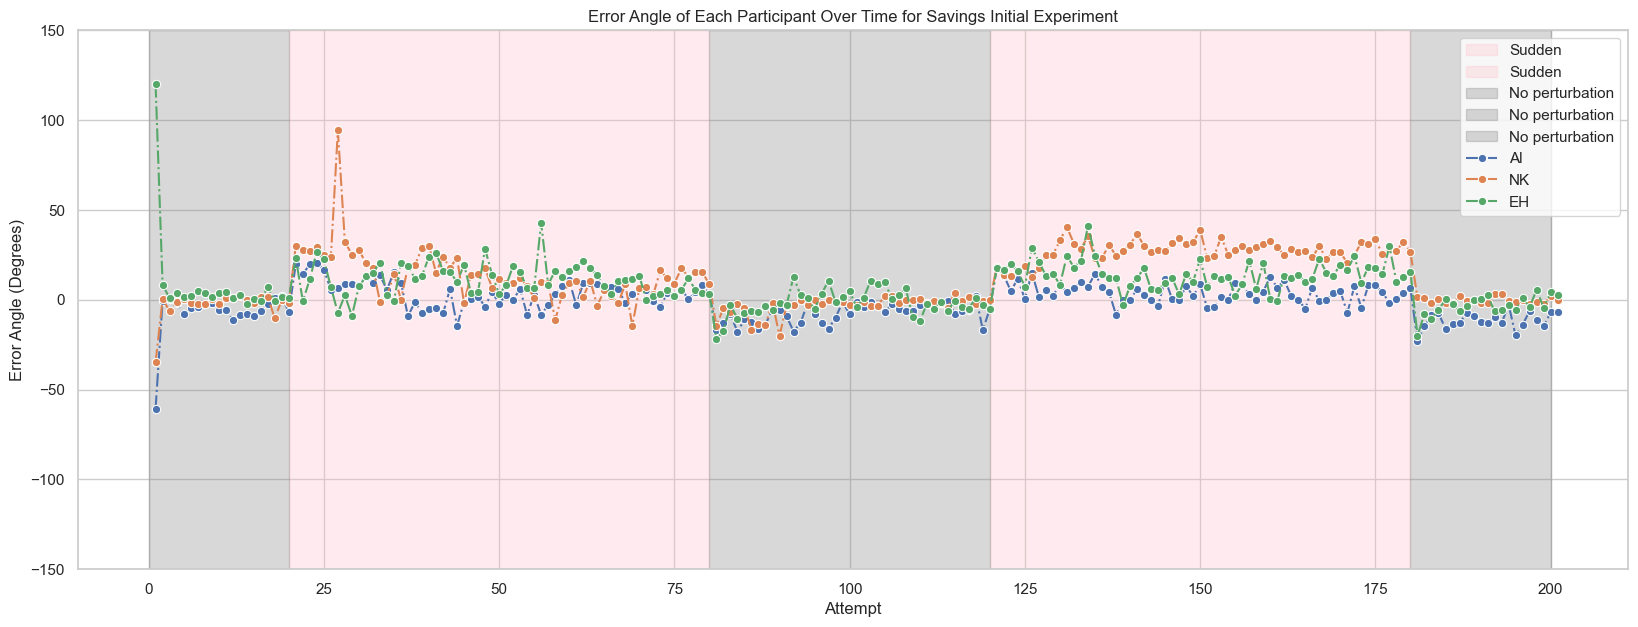

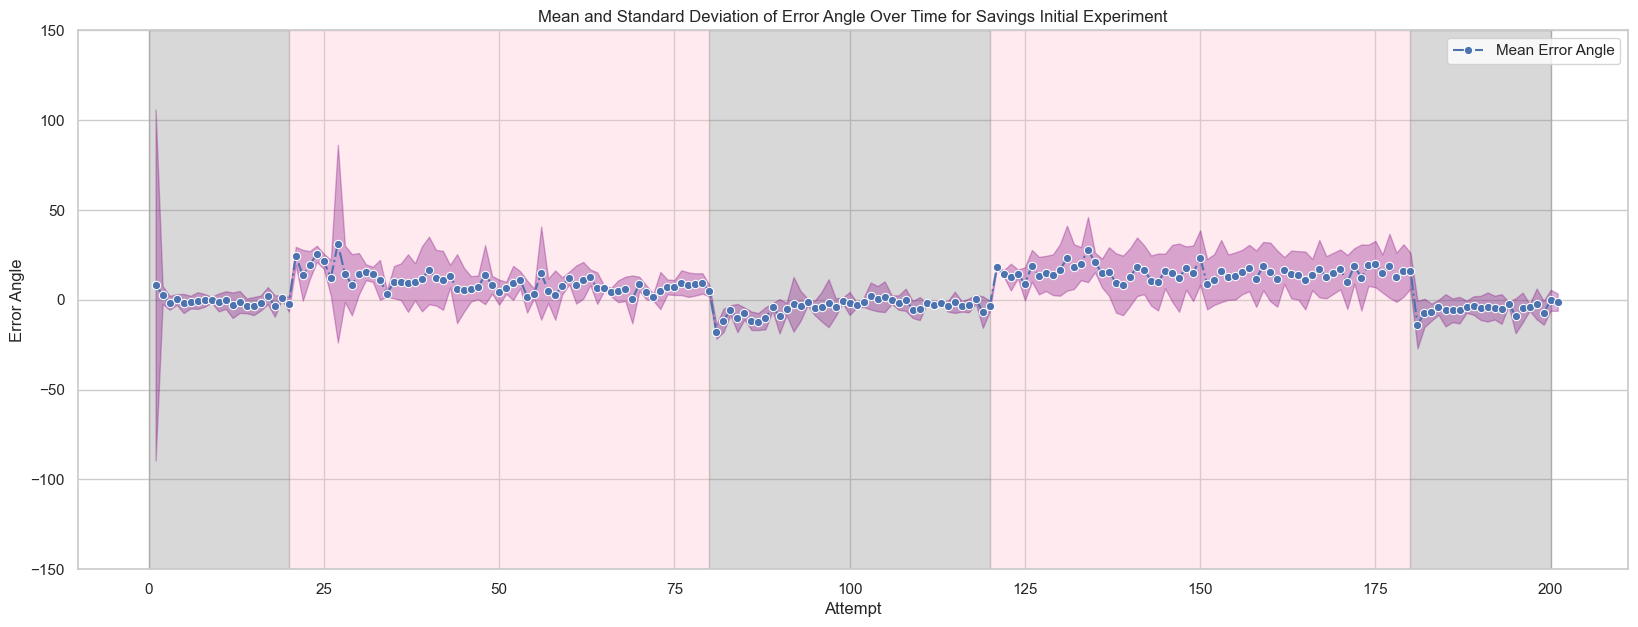

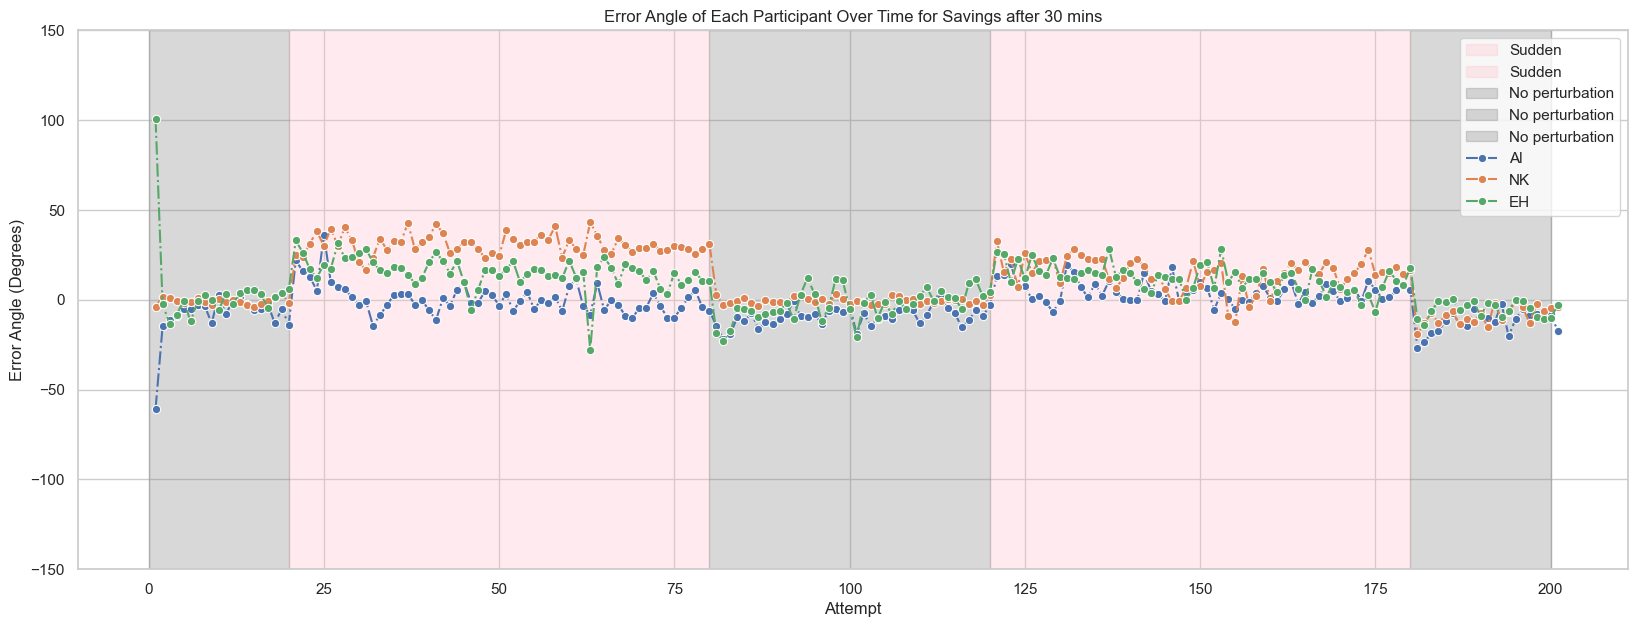

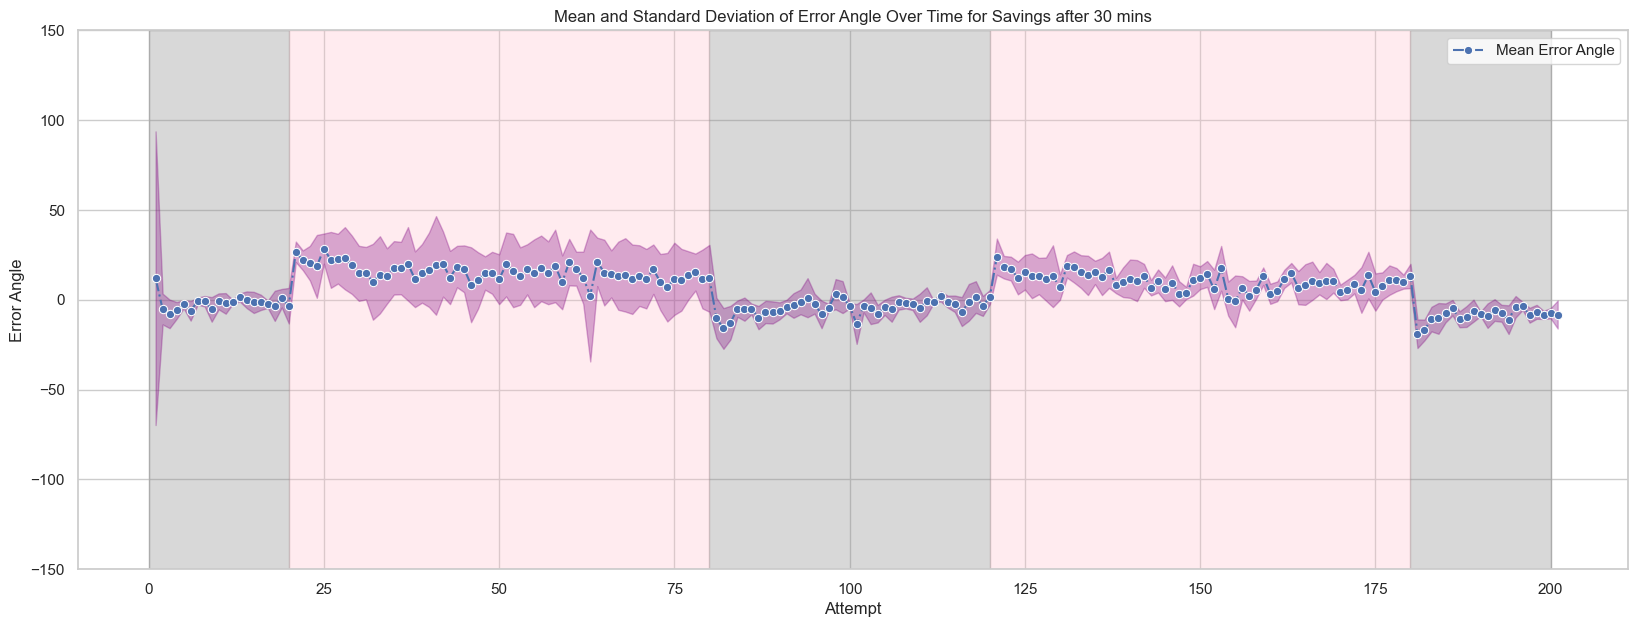

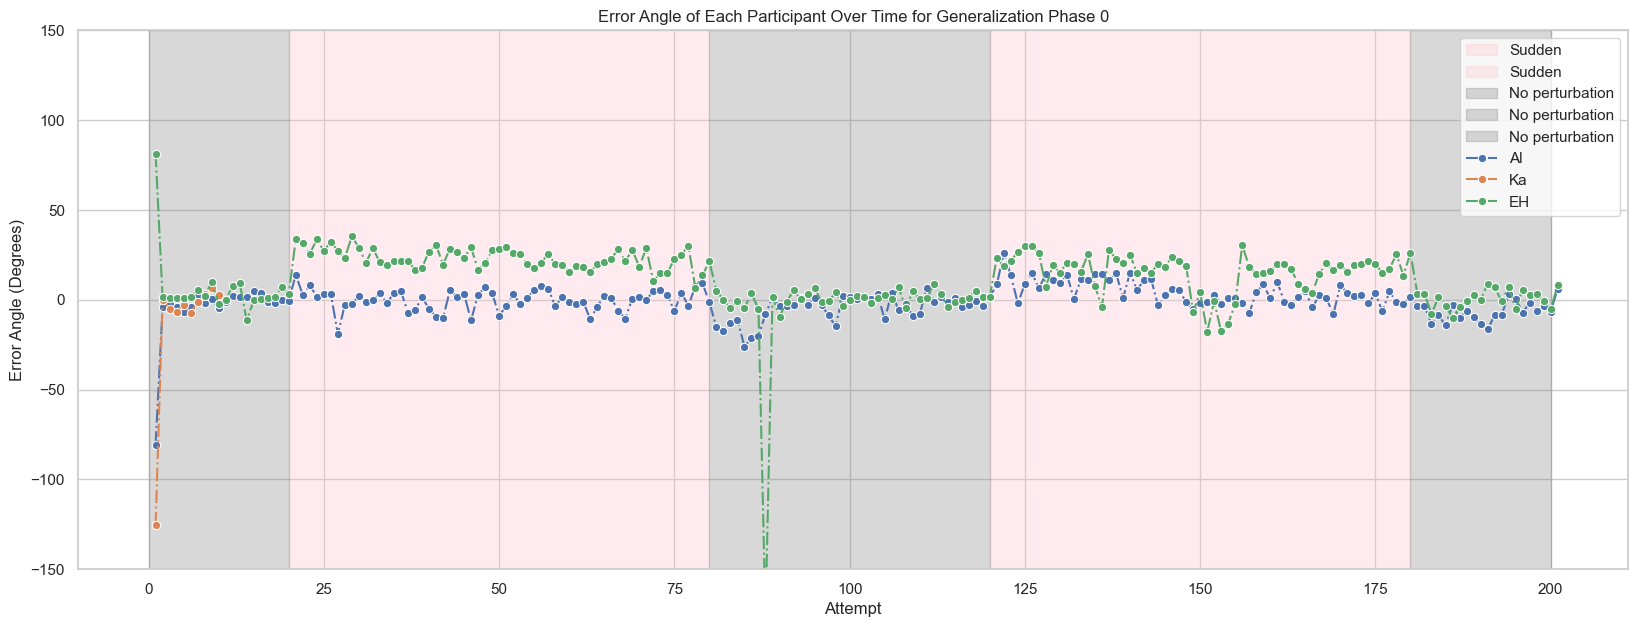

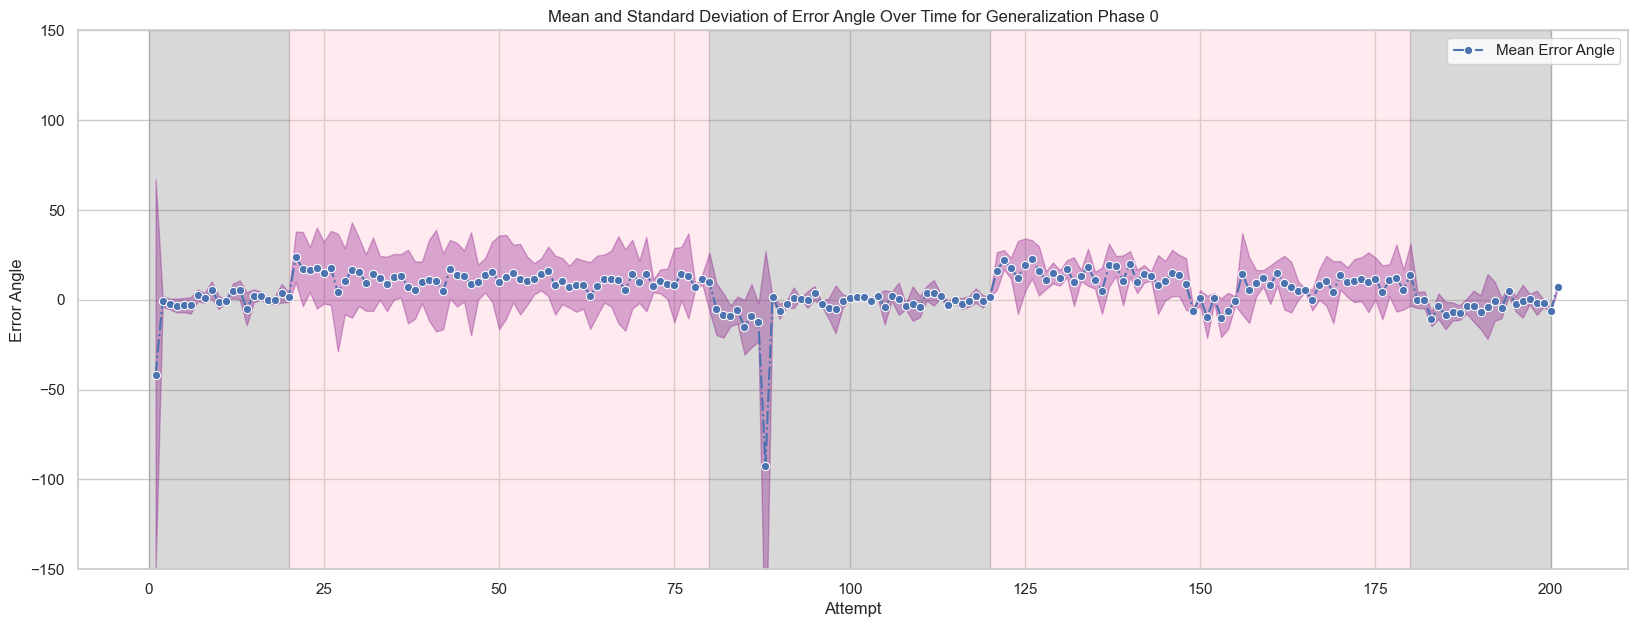

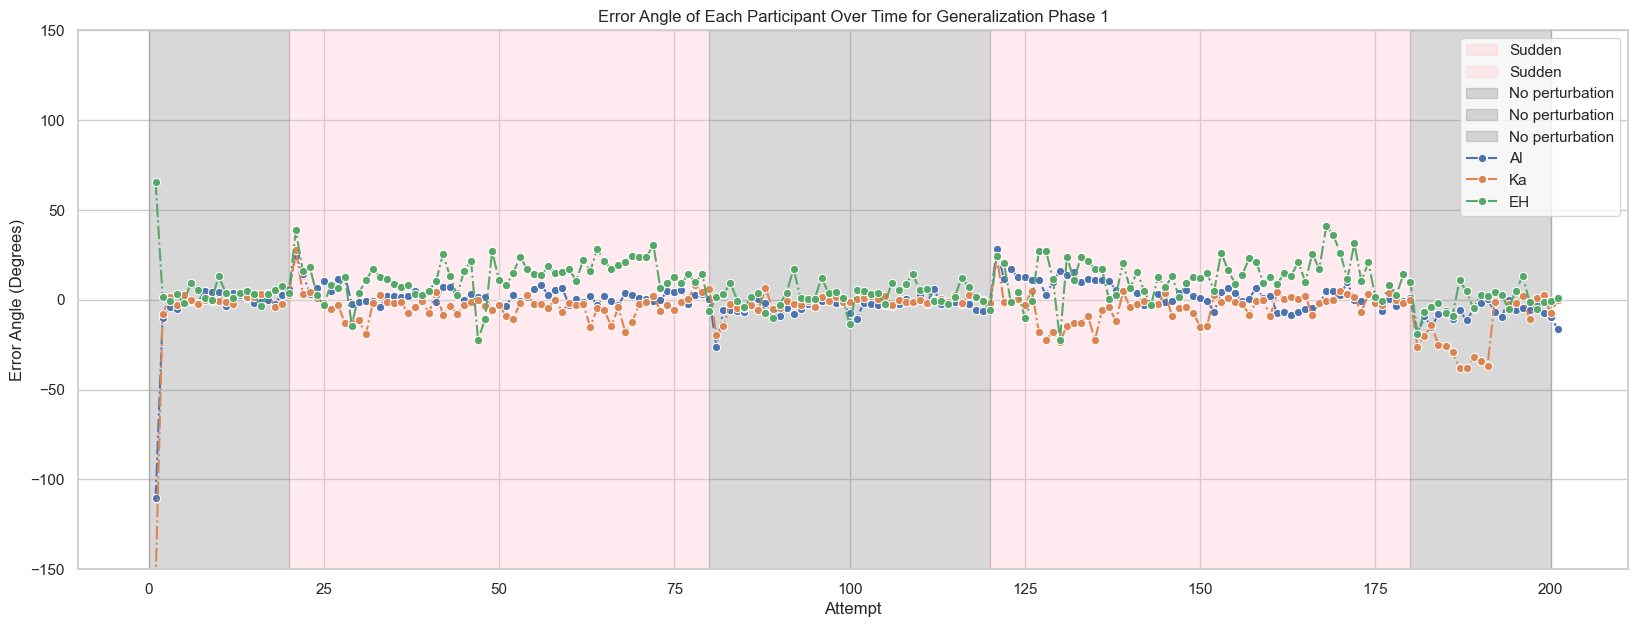

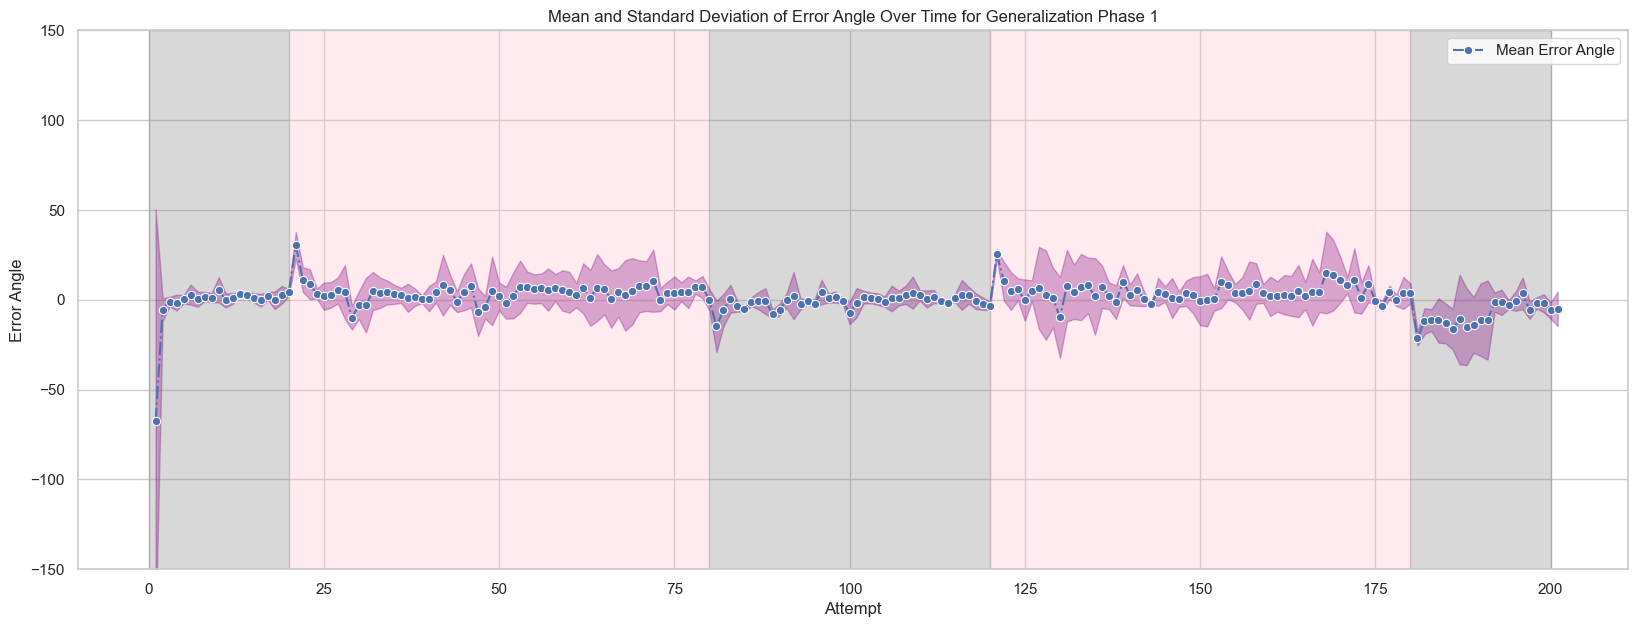

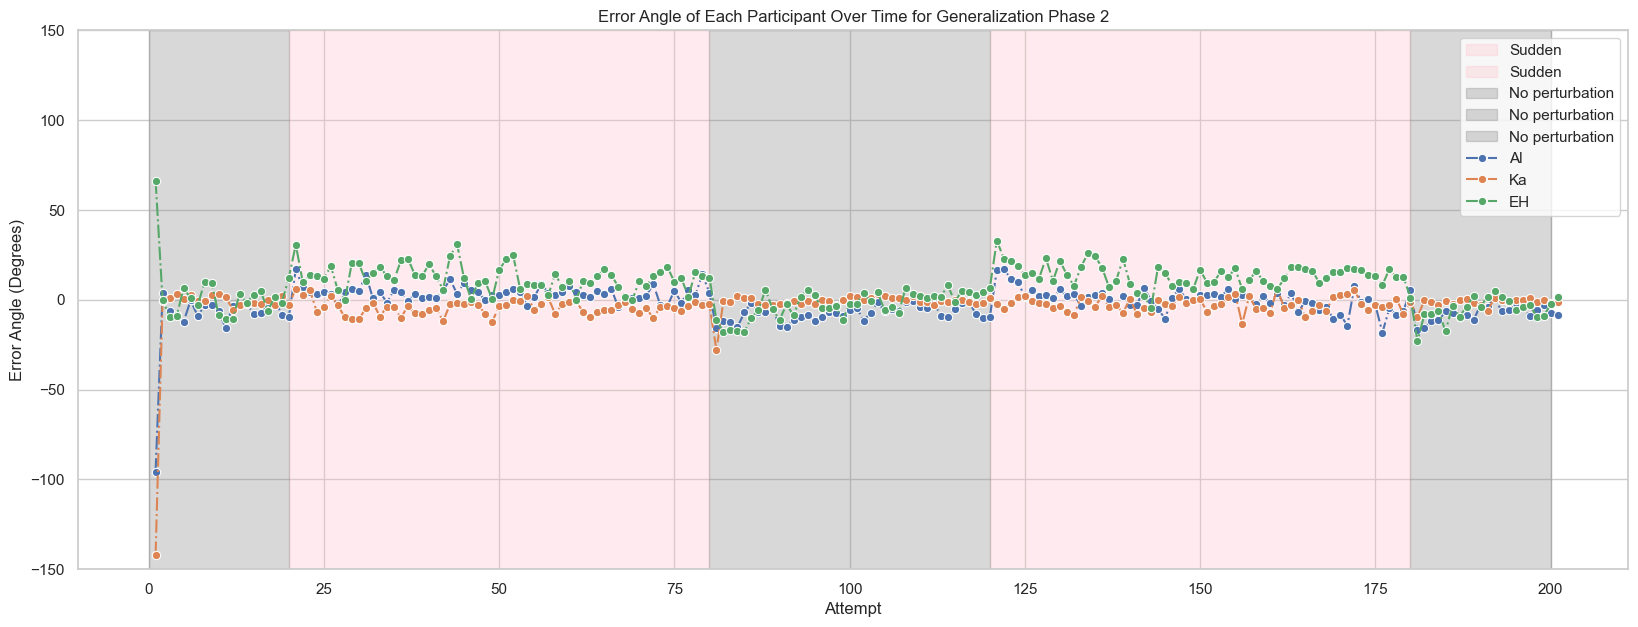

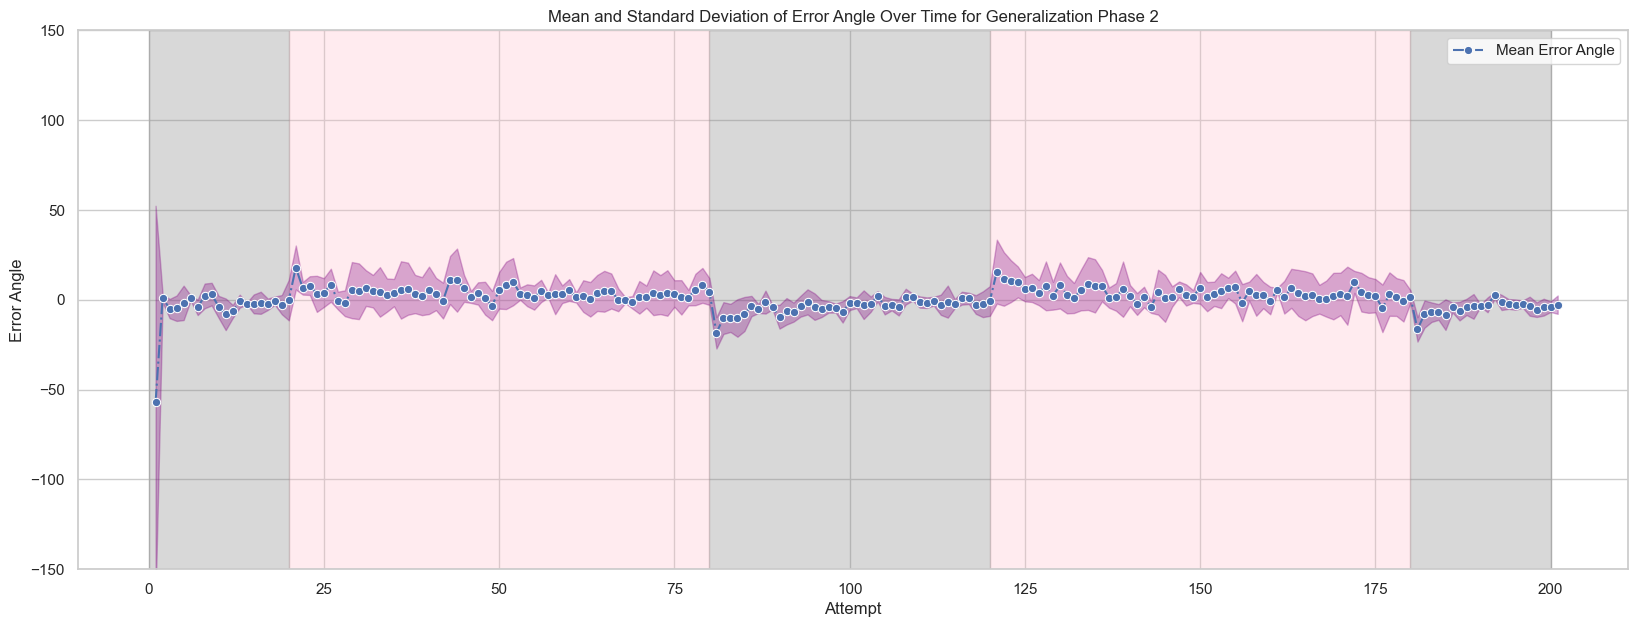

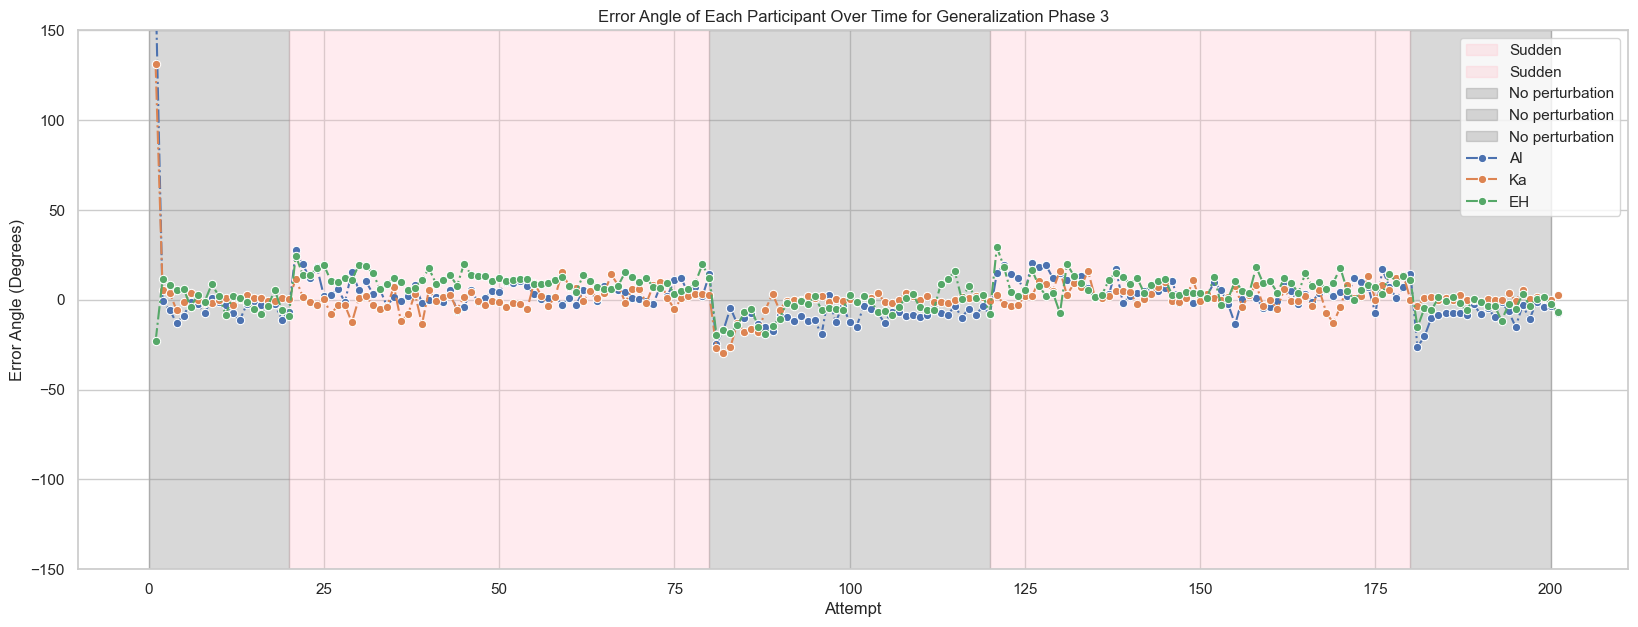

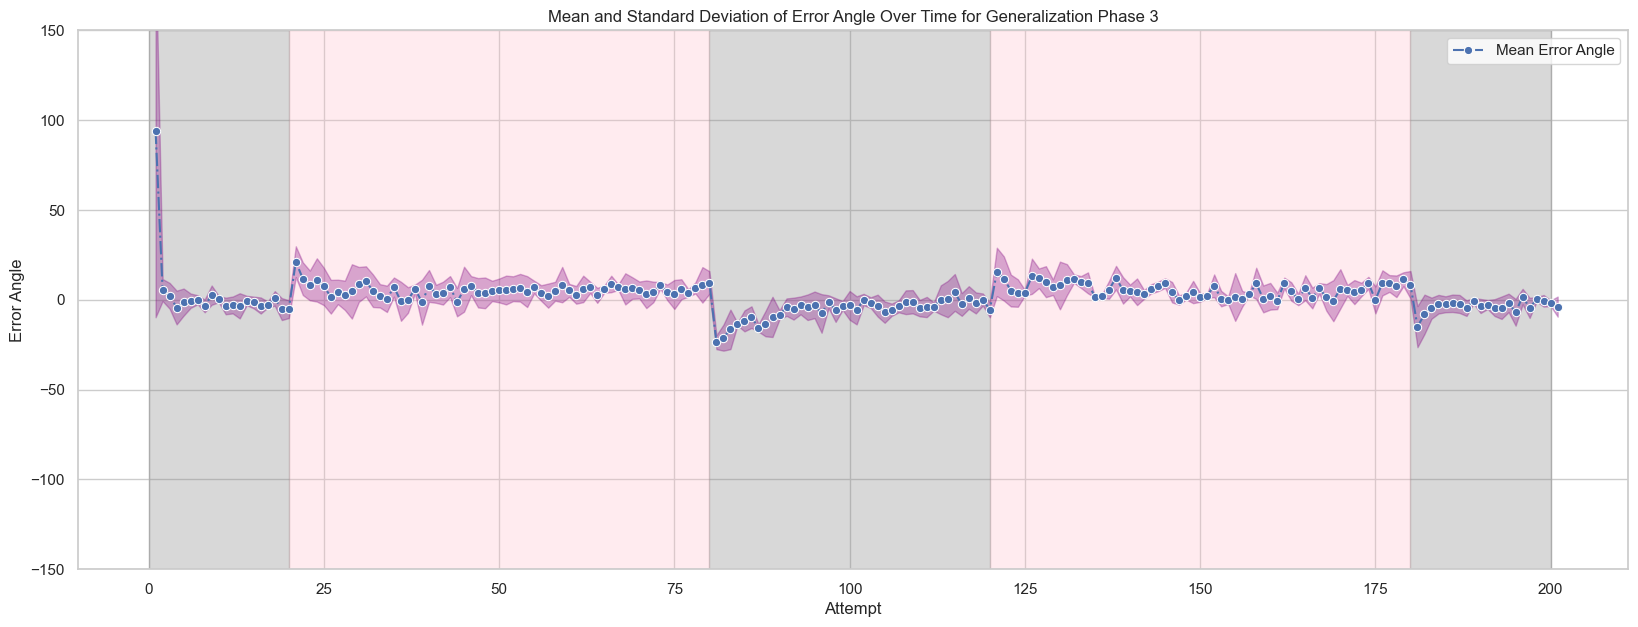

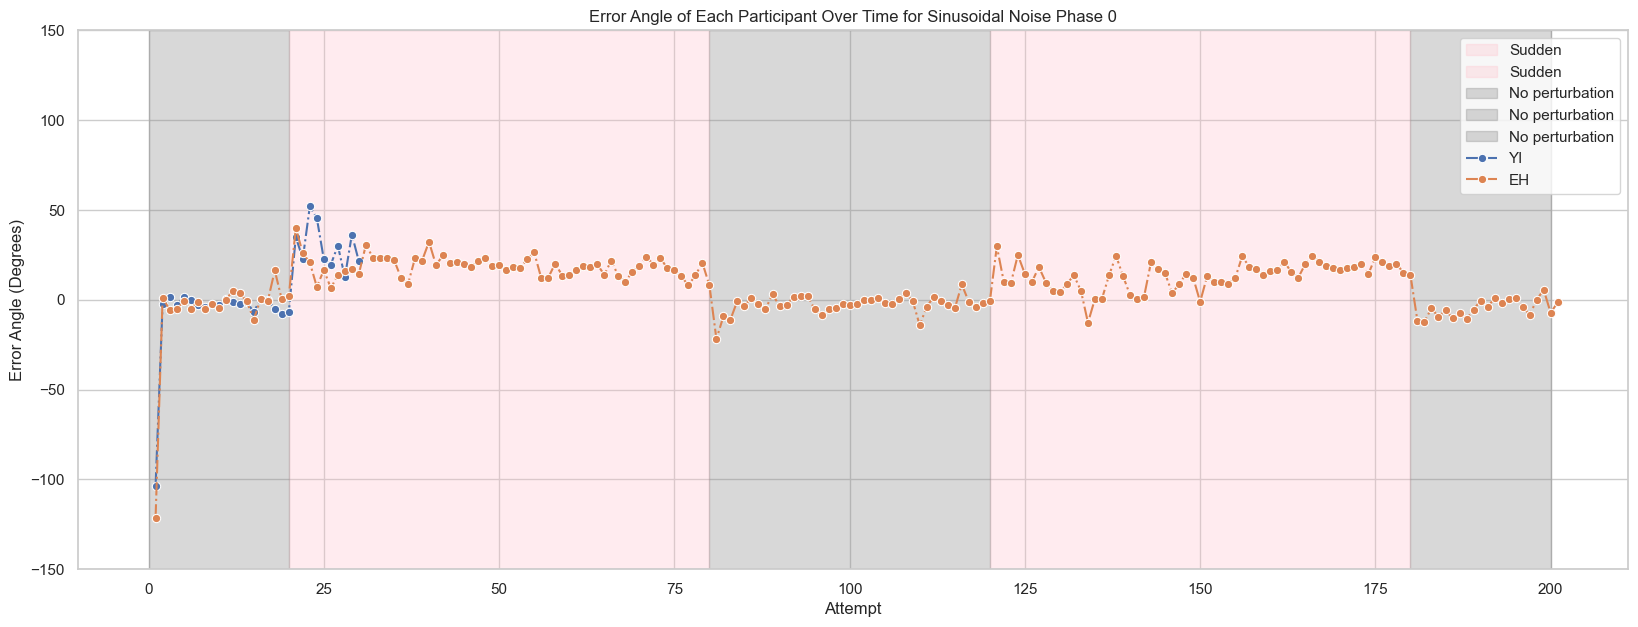

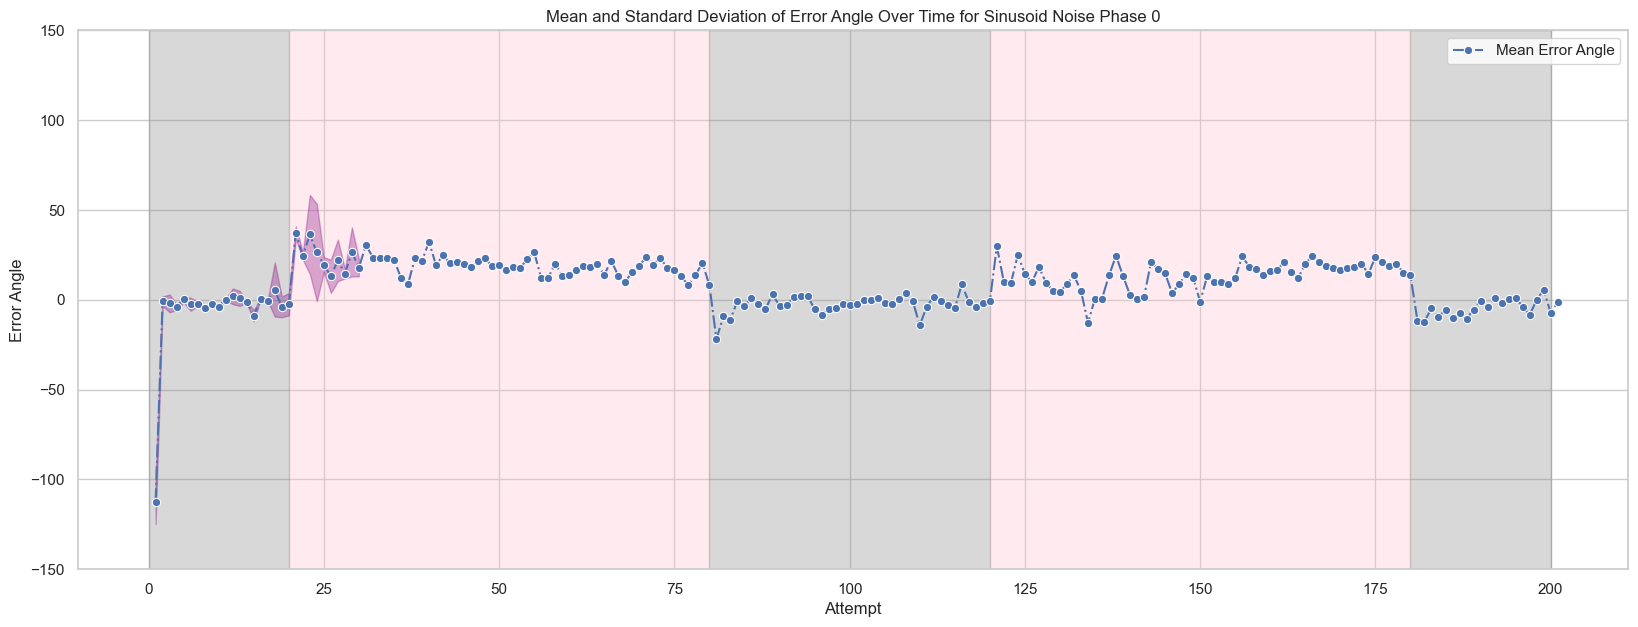

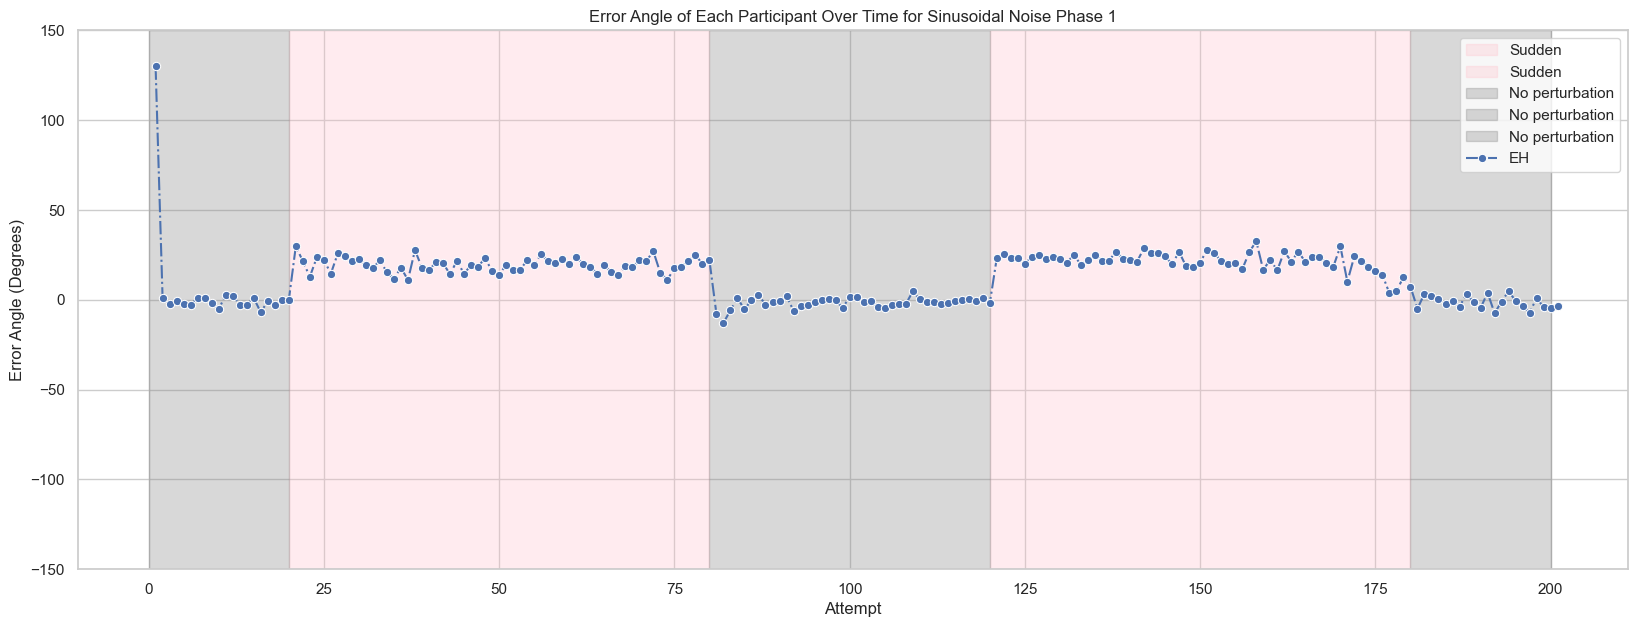

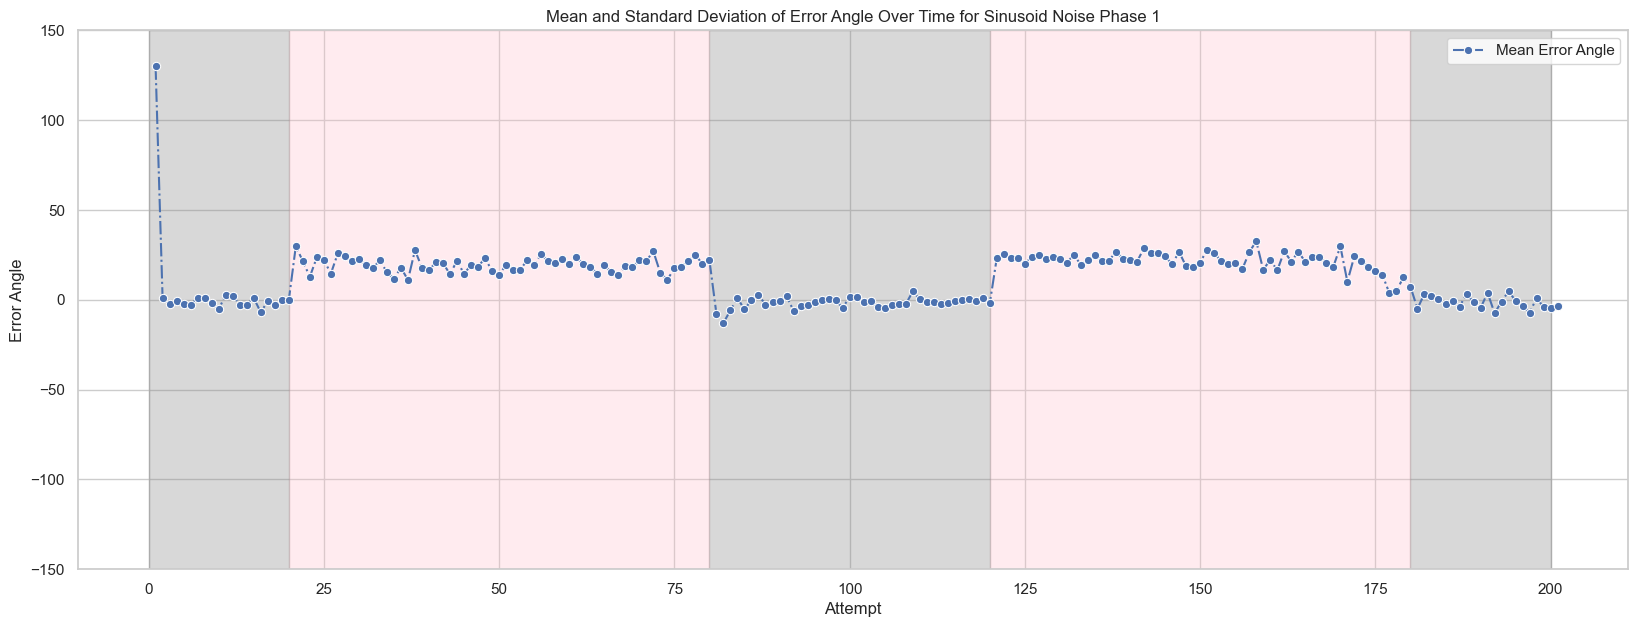

In [58]:
plot_error_angle_for_participants(savings_subjects_phase_0, experimental_conditions, label="Savings Initial Experiment")
plot_cross_participant_error_angles(savings_subjects_phase_0, experimental_conditions, label="Savings Initial Experiment")

plot_error_angle_for_participants(savings_subjects_phase_1, experimental_conditions, label="Savings after 30 mins")
plot_cross_participant_error_angles(savings_subjects_phase_1, experimental_conditions, label="Savings after 30 mins")

plot_error_angle_for_participants(subjects_generalization_0, experimental_conditions, label="Generalization Phase 0")
plot_cross_participant_error_angles(subjects_generalization_0, experimental_conditions, label="Generalization Phase 0")

plot_error_angle_for_participants(subjects_generalization_1, experimental_conditions, label="Generalization Phase 1")
plot_cross_participant_error_angles(subjects_generalization_1, experimental_conditions, label="Generalization Phase 1")

plot_error_angle_for_participants(subjects_generalization_2, experimental_conditions, label="Generalization Phase 2")
plot_cross_participant_error_angles(subjects_generalization_2, experimental_conditions, label="Generalization Phase 2")

plot_error_angle_for_participants(subjects_generalization_3, experimental_conditions, label="Generalization Phase 3")
plot_cross_participant_error_angles(subjects_generalization_3, experimental_conditions, label="Generalization Phase 3")

plot_error_angle_for_participants(bonus_subjects_phase_0, experimental_conditions, label="Sinusoidal Noise Phase 0")
plot_cross_participant_error_angles(bonus_subjects_phase_0, experimental_conditions, label="Sinusoid Noise Phase 0")

plot_error_angle_for_participants(bonus_subjects_phase_1, experimental_conditions, label="Sinusoidal Noise Phase 1")
plot_cross_participant_error_angles(bonus_subjects_phase_1, experimental_conditions, label="Sinusoid Noise Phase 1")

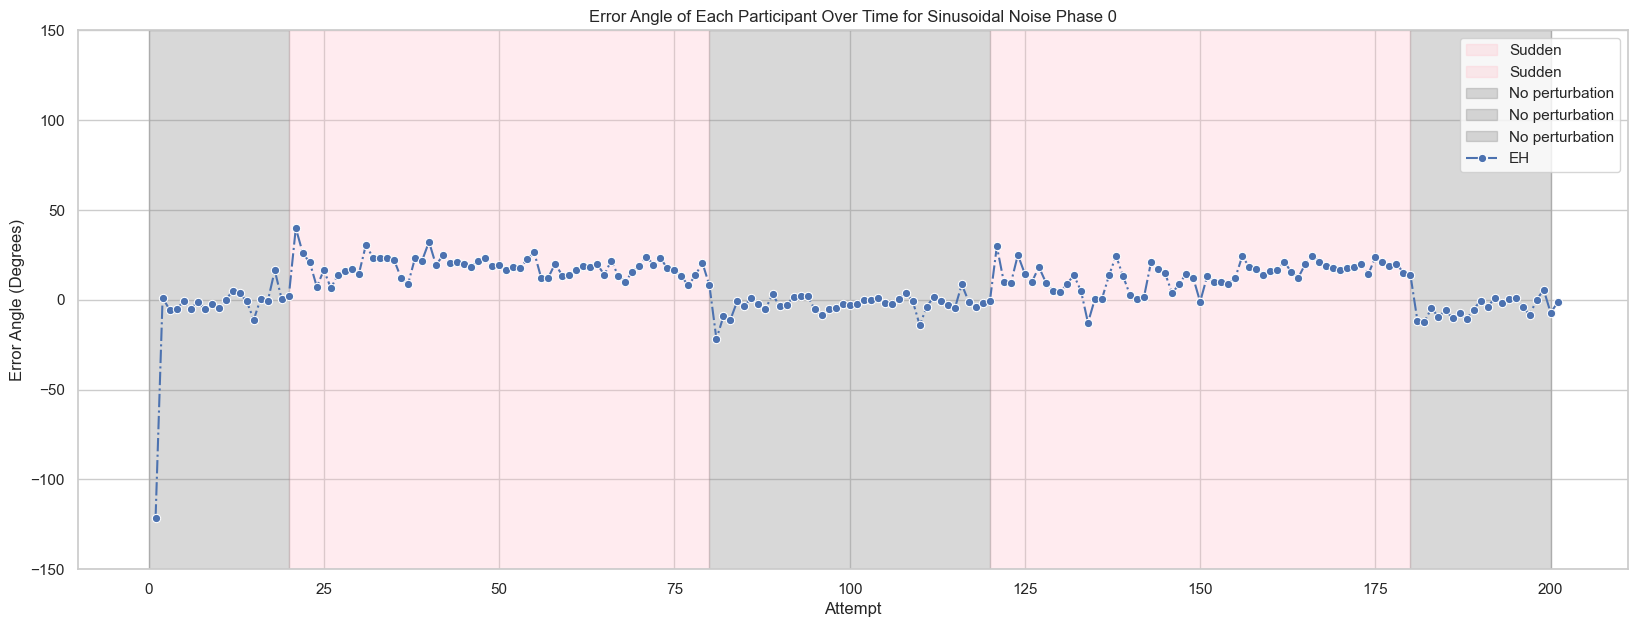

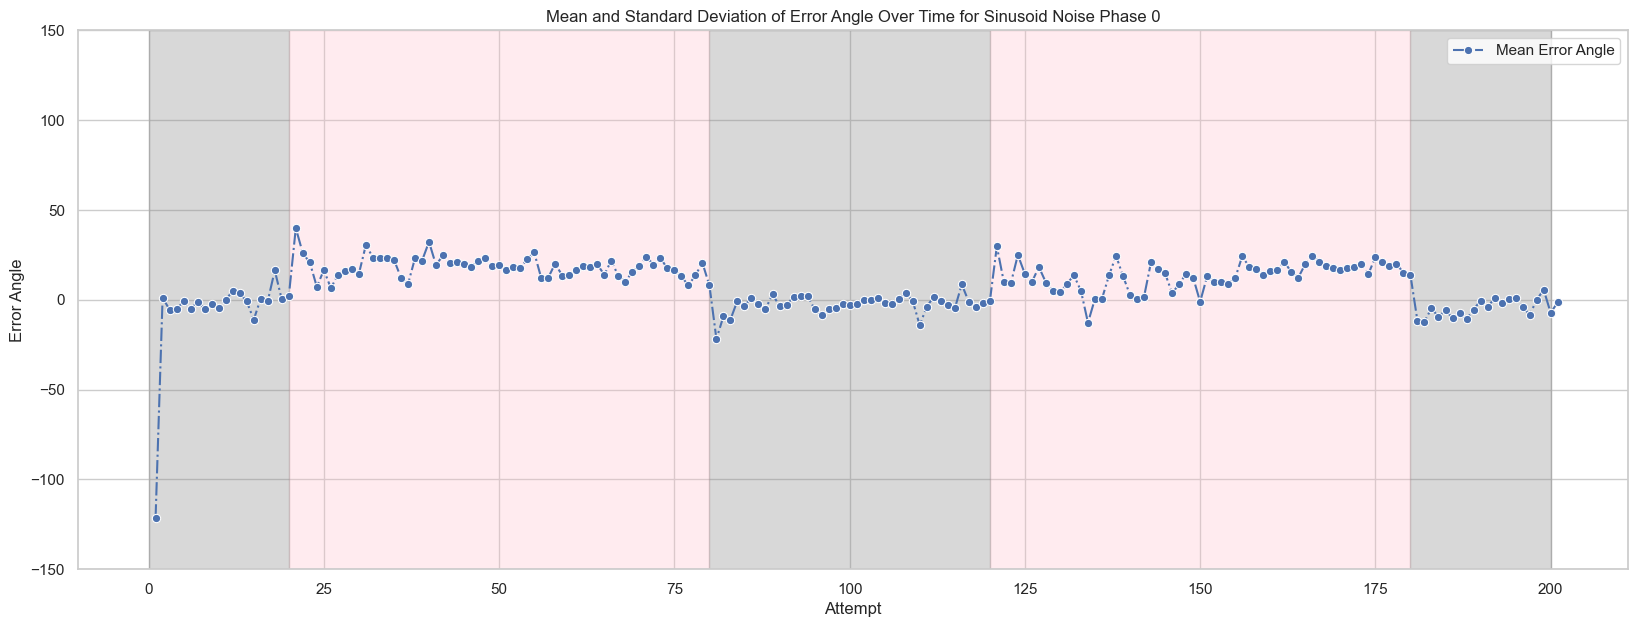

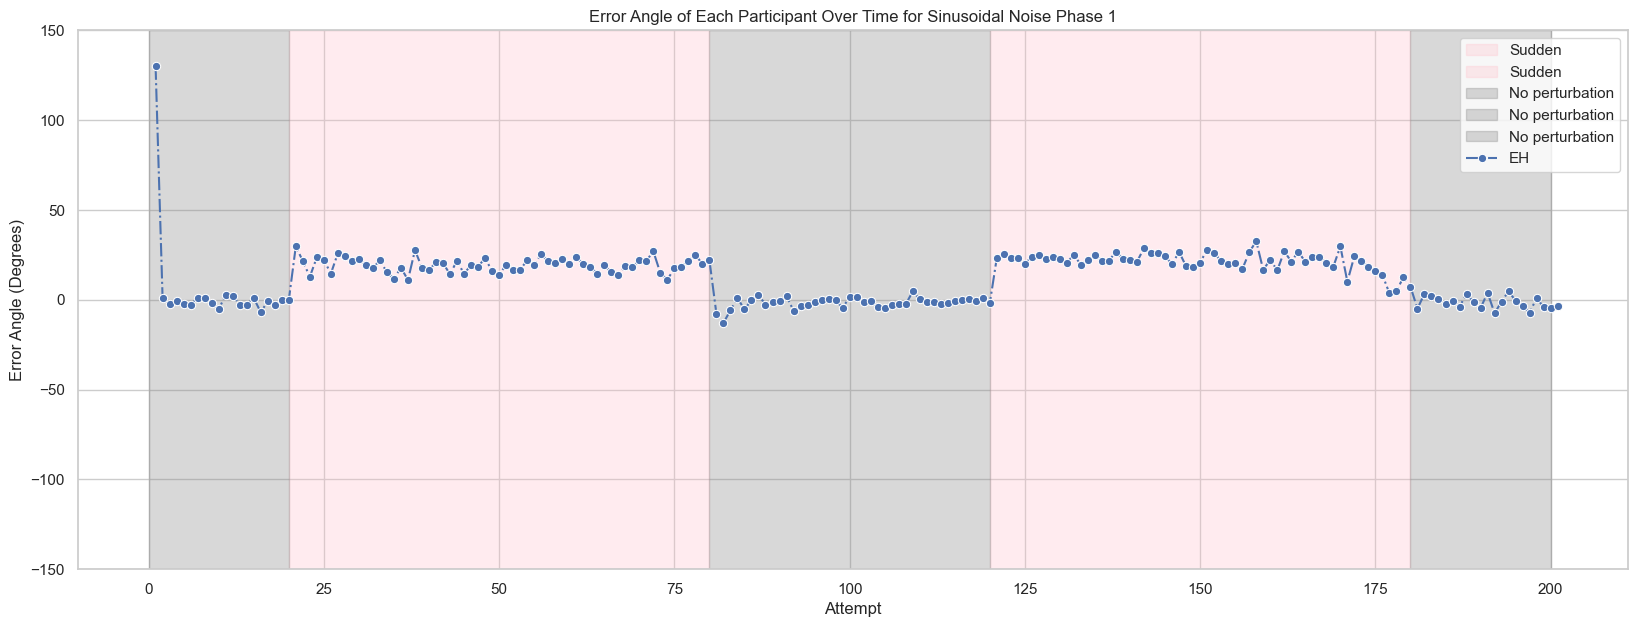

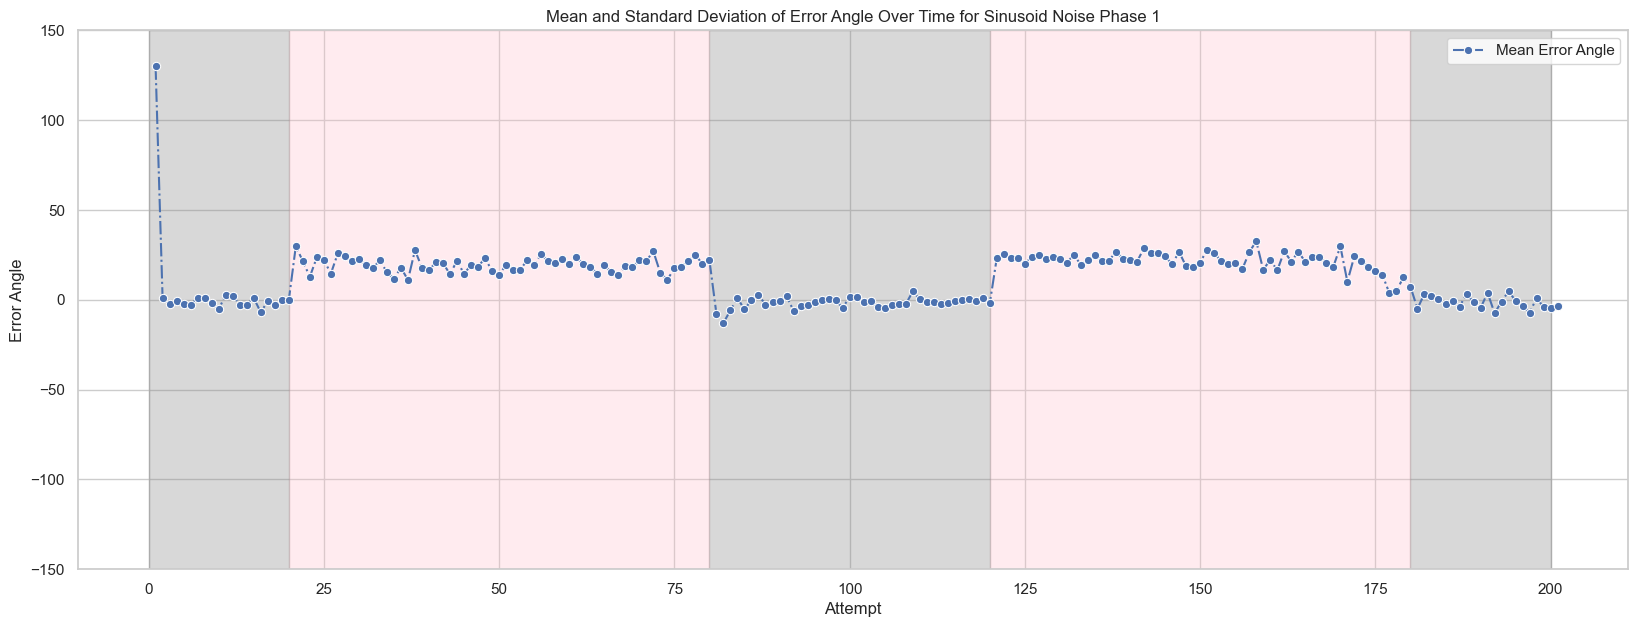

In [16]:
plot_error_angle_for_participants(bonus_subjects_phase_0, experimental_conditions, label="Sinusoidal Noise Phase 0")
plot_cross_participant_error_angles(bonus_subjects_phase_0, experimental_conditions, label="Sinusoid Noise Phase 0")

plot_error_angle_for_participants(bonus_subjects_phase_1, experimental_conditions, label="Sinusoidal Noise Phase 1")
plot_cross_participant_error_angles(bonus_subjects_phase_1, experimental_conditions, label="Sinusoid Noise Phase 1")

### Participant 

## TASK-1: Implementation of recording mode and new experiment.

### Experimental Methodology

#### Plot the error_angles,  add *better* plot to observe the motor adaptation (e.g. see lectures)

## TASK-2: Analysis of experiment on unbiased subjects

### Rerun first experiment with two sudden pertubations, repeat it after 30 minutes (all)

### Record the same subject performing your own experiment 

## TASK-3: Discussion of Results.


### Is there any motor adaptation left after 30 minutes? 

### Under which conditions was your subject able to generalize to new target positions? (A)

## Task-4: Independent Experiments.

In [ ]:
def fake_participant_data_experiment_sudden_1(particpant_id, session_id, num_attempts):
    return pd.DataFrame({
    'Particpant ID': [particpant_id] * 100,
    'Session': [session_id] * 100,
    'Attempt': np.arange(0, 100),
    
    'Error Angle': np.concat([
        # Attempt 0 - 20 - without perturbation
        30 + np.random.uniform(-1, 1, 20) *5, 
        # Attmept 20-80 with perturbation
        30+20 + np.random.uniform(-10, 10, 60)*5,
        # Attempt 80-100 without perturbation
        30 + np.random.uniform(-1, 1, 20)*5
    ])
    })

## SCRATCH SPACE

In [ ]:
subjects = pd.concat([fake_participant_data_experiment_sudden_1(participant_id, 1, 100) for participant_id in range(3)])
subjects 